# Model Cross-Comparison: Extra Plots

James Yu, 27 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We look at two different classes of networks:

In [2]:
A_1 = np.array([
    [0.9, 0.07, 0.03],
    [0.07, 0.58, 0.35],
    [0.03, 0.35, 0.62]
])

A_2 = np.array([
    [0.48, 0.3, 0.22],
    [0.3, 0.52, 0.18],
    [0.22, 0.18, 0.6]
])

In [3]:
eigvals_1, U_1 = np.linalg.eig(A_1)
eigvals_1

array([1.        , 0.85199338, 0.24800662])

The second-largest eigenvalue is 0.852.

In [4]:
eigvals_2, U_2 = np.linalg.eig(A_2)
eigvals_2

array([1.        , 0.19416995, 0.40583005])

The second-largest eigenvalue is 0.406.

In [5]:
delta = 0.9
c = 1.0
T = 60
x_0 = np.array([[10.0, -5.0, 5.0]], ndmin = 2).T
x_0

array([[10.],
       [-5.],
       [ 5.]])

In [6]:
D_1 = np.diag(eigvals_1)
D_2 = np.diag(eigvals_2)
tilde_x_0_1 = U_1.T @ x_0
tilde_x_0_2 = U_2.T @ x_0

In [34]:
tilde_x_0_1

array([[5.77350269],
       [7.74525653],
       [7.5284572 ]])

In [36]:
tilde_x_0_2

array([[ -5.77350269],
       [-10.12073063],
       [  3.77325829]])

# Convergence

In [7]:
def finite_solution(A, delta, c, T, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    for i in range(T): # generate solution matrices
        K_t = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t)

    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [U.T @ x_0]
    for i, K in enumerate(K_sequence[1:]): # L_0(K_1), L_1(K_2), etc
        L_t = -delta * (np.linalg.inv((delta * K) + (c * I)) @ K @ D)
        tilde_r_t = L_t @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_ts.append(tilde_x_t_new)
        r_ts.append(tilde_r_t)
        
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts

In [8]:
x_sequence_1, r_sequence_1 = finite_solution(A_1, delta, c, T, x_0)
x_sequence_2, r_sequence_2 = finite_solution(A_2, delta, c, T, x_0)

## Finite-horizon:

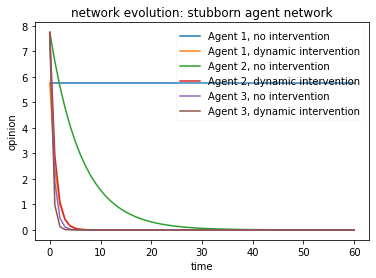

In [9]:
xs_1 = [np.linalg.matrix_power(D_1, t) @ tilde_x_0_1 for t in range(T+1)]
for i in range(3):
    plt.plot(range(T+1), [xs_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(T+1), [x_sequence_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

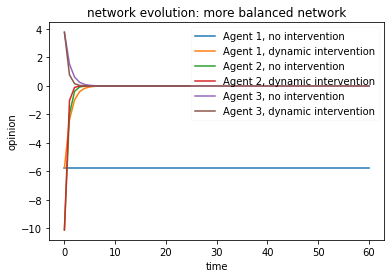

In [10]:
xs_2 = [np.linalg.matrix_power(D_2, t) @ tilde_x_0_2 for t in range(T+1)]
for i in range(3):
    plt.plot(range(T+1), [xs_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(T+1), [x_sequence_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

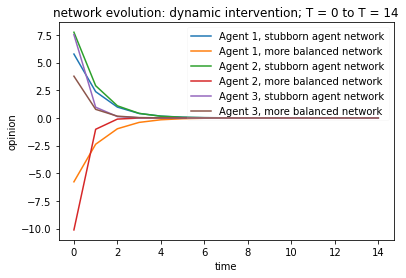

In [11]:
for i in range(3):
    plt.plot(range(15), [x_sequence_1[j][i].item() for j in range(15)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(15), [x_sequence_2[j][i].item() for j in range(15)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: dynamic intervention; T = 0 to T = 14")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

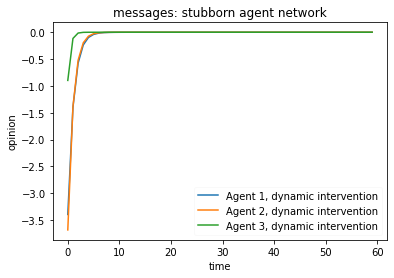

In [12]:
for i in range(3):
    plt.plot(range(T), [r_sequence_1[j][i].item() for j in range(T)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network")
plt.legend(framealpha = 0.1)
plt.show()

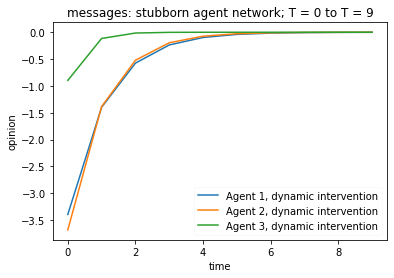

In [13]:
for i in range(3):
    plt.plot(range(10), [r_sequence_1[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

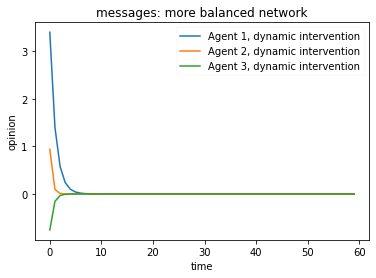

In [14]:
for i in range(3):
    plt.plot(range(T), [r_sequence_2[j][i].item() for j in range(T)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network")
plt.legend(framealpha = 0.1)
plt.show()

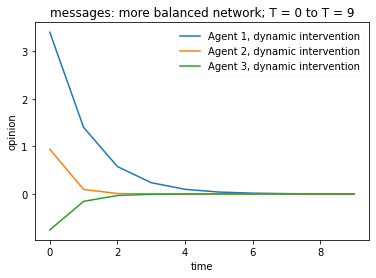

In [15]:
for i in range(3):
    plt.plot(range(10), [r_sequence_2[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

## Infinite-horizon

Comparisons are made to the same no-intervention data as in the finite-horizon case

In [16]:
def infinite_solution(A, delta, c, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    while True: # generate solution matrices
        K_t_new = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t_new)
        if np.allclose(K_t, K_t_new, 
                       rtol = np.finfo(K_t.dtype).eps, 
                       atol = np.finfo(K_t.dtype).eps):
            break
        K_t = K_t_new
        
    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [U.T @ x_0]
    K_ss = K_sequence[0]
    while True:
        L_ss = -delta * (np.linalg.inv((delta * K_ss) + (c * I)) @ K_ss @ D)
        tilde_r_t = L_ss @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_ts.append(tilde_x_t_new)
        r_ts.append(tilde_r_t)
        
        if np.allclose(tilde_x_t, tilde_x_t_new, 
                       rtol = np.finfo(tilde_x_t.dtype).eps, 
                       atol = np.finfo(tilde_x_t.dtype).eps):
            break
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts, K_ss

In [17]:
x_sequence_1i, r_sequence_1i, K_ss_1 = infinite_solution(A_1, delta, c, x_0)
x_sequence_2i, r_sequence_2i, K_ss_2 = infinite_solution(A_2, delta, c, x_0)

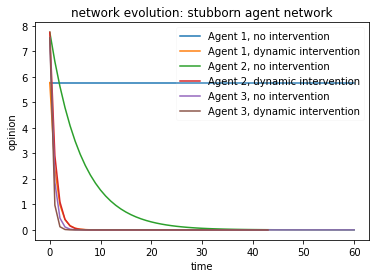

In [18]:
for i in range(3):
    plt.plot(range(T+1), [xs_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(len(x_sequence_1i)), [x_sequence_1i[j][i].item() for j in range(len(x_sequence_1i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

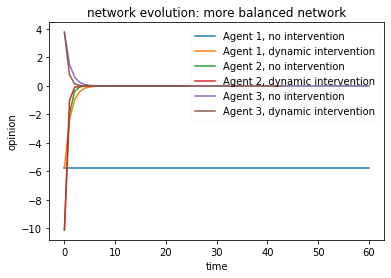

In [19]:
for i in range(3):
    plt.plot(range(T+1), [xs_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(len(x_sequence_2i)), [x_sequence_2i[j][i].item() for j in range(len(x_sequence_2i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

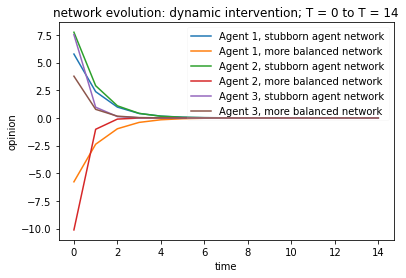

In [20]:
for i in range(3):
    plt.plot(range(15), [x_sequence_1i[j][i].item() for j in range(15)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(15), [x_sequence_2i[j][i].item() for j in range(15)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: dynamic intervention; T = 0 to T = 14")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

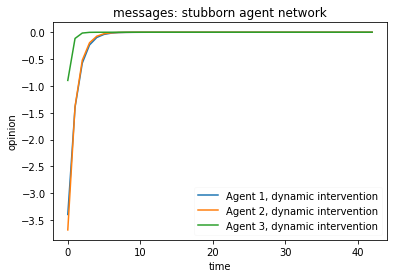

In [21]:
for i in range(3):
    plt.plot(range(len(r_sequence_1i)), [r_sequence_1i[j][i].item() for j in range(len(r_sequence_1i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network")
plt.legend(framealpha = 0.1)
plt.show()

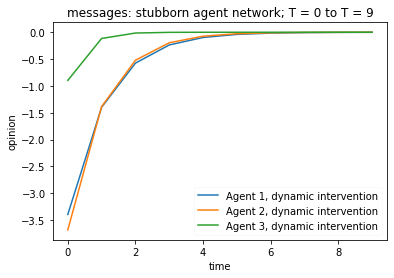

In [22]:
for i in range(3):
    plt.plot(range(10), [r_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

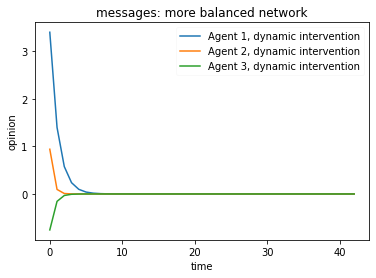

In [23]:
for i in range(3):
    plt.plot(range(len(r_sequence_2i)), [r_sequence_2i[j][i].item() for j in range(len(r_sequence_2i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network")
plt.legend(framealpha = 0.1)
plt.show()

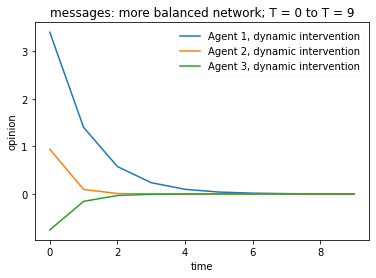

In [24]:
for i in range(3):
    plt.plot(range(10), [r_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

# Comparison between infinite-horizon dynamic targeting and one-shot targeting

In [25]:
# finite/infinite horizon behaves the same in intermediate periods,
#   so pinning T to that of the infinite horizon model
def one_shot(A, delta, c, T, x_0):
    I = np.identity(len(x_0))
    eigvals, U = np.linalg.eig(A)
    xs = [U.T @ x_0]
    D = np.diag(eigvals)
    tilde_x_0 = U.T @ x_0
    tilde_r_0 = -delta * np.linalg.inv((c * I) + (delta * np.linalg.inv(I - (delta * (D @ D))))) @ np.linalg.inv(I - (delta * (D @ D))) @ D @ tilde_x_0
    tilde_x_t = D @ tilde_x_0 + tilde_r_0
    xs.append(tilde_x_t)
    print("tilde_r_0 =", tilde_r_0.T)
    for i in range(T-1):
        tilde_x_t = D @ tilde_x_t
        xs.append(tilde_x_t)

    return xs

In [26]:
one_xs_1 = one_shot(A_1, delta, c, len(x_sequence_1i) - 1, x_0)

tilde_r_0 = [[-5.19615242 -4.7638028  -0.91096007]]


In [27]:
one_xs_2 = one_shot(A_2, delta, c, len(x_sequence_2i) - 1, x_0)

tilde_r_0 = [[ 5.19615242  0.9477829  -0.78673003]]


Compare this to the first messages in the dynamic model:

In [28]:
r_sequence_1i[:3]

[array([[-3.39714832],
        [-3.68528969],
        [-0.89799905]]),
 array([[-1.39825487],
        [-1.3863356 ],
        [-0.11559583]]),
 array([[-0.57551702],
        [-0.52151297],
        [-0.01488019]])]

In [29]:
r_sequence_2i[:3]

[array([[ 3.39714832],
        [ 0.93961362],
        [-0.75521391]]),
 array([[ 1.39825487],
        [ 0.09521054],
        [-0.15533318]]),
 array([[ 0.57551702],
        [ 0.00964763],
        [-0.03194909]])]

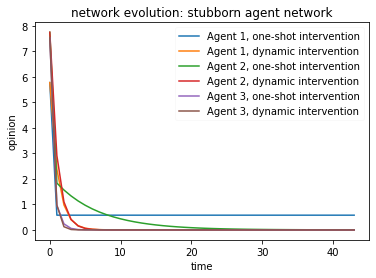

In [30]:
for i in range(3):
    plt.plot(range(len(one_xs_1)), [one_xs_1[j][i].item() for j in range(len(one_xs_1))], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(len(x_sequence_1i)), [x_sequence_1i[j][i].item() for j in range(len(x_sequence_1i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

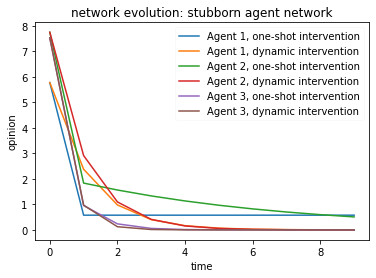

In [31]:
for i in range(3):
    plt.plot(range(10), [one_xs_1[j][i].item() for j in range(10)], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

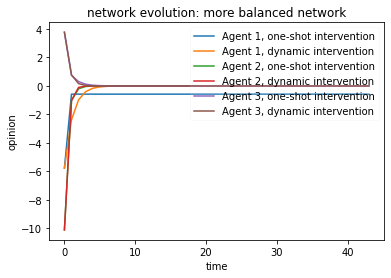

In [32]:
for i in range(3):
    plt.plot(range(len(one_xs_2)), [one_xs_2[j][i].item() for j in range(len(one_xs_2))], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(len(x_sequence_2i)), [x_sequence_2i[j][i].item() for j in range(len(x_sequence_2i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

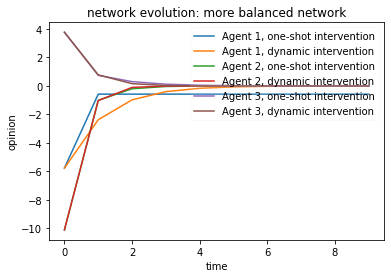

In [33]:
for i in range(3):
    plt.plot(range(10), [one_xs_2[j][i].item() for j in range(10)], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(10), [x_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()